<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-и-опишем-подробнее-следующие-параметры:" data-toc-modified-id="Изучим-и-опишем-подробнее-следующие-параметры:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим и опишем подробнее следующие параметры:</a></span></li><li><span><a href="#Изучите,-как-быстро-продавались-квартиры" data-toc-modified-id="Изучите,-как-быстро-продавались-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучите, как быстро продавались квартиры</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта?" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Какие факторы больше всего влияют на общую (полную) стоимость объекта?</a></span></li><li><span><a href="#Посчитайте-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений." data-toc-modified-id="Посчитайте-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.</a></span></li><li><span><a href="#Вычислите-среднюю-цену-каждого-километра-в-Санкт-Петербурге.-Опишите,-как-стоимость-объектов-зависит-от-расстояния-до-центра-города." data-toc-modified-id="Вычислите-среднюю-цену-каждого-километра-в-Санкт-Петербурге.-Опишите,-как-стоимость-объектов-зависит-от-расстояния-до-центра-города.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вычислите среднюю цену каждого километра в Санкт-Петербурге. Опишите, как стоимость объектов зависит от расстояния до центра города.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 50) 
data = pd.read_csv('real_estate_data.csv', sep = '\t')
#посмотрим на первые 5 строк датафрейма
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Вывод:** По первым 5 строкам видими пропущенные значения в некоторых столбцах. Изучим подробнее типы данных и кол-во ненулевых значений

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:** Имеем пропущенные значения по следующим столбцам -   

* `ceiling_height`,  

* `floors_total`,  
* `living_area`,  
* `is_apartment`,  
* `kitchen_area`,  
* `balcony`,  
* `locality_name`,    
* `airports_nearest`,  
* `cityCenters_nearest`,  
* `parks_around3000`,  
* `parks_nearest`,  
* `ponds_around3000`,    
* `ponds_nearest`,  
* `days_exposition`  

Также в датафрейме присутствуют некорректные типы данных для некоторых столбцов:

* `first_day_exposition` - object (должен быть тип datetime, т.к. это дата)

* `days_exposition` - float64 (должен быть int, т.к. кол-во дней - это целое число)
* `floors_total` - float64 (должен быть int, т.к. кол-во этажей - это целое число)


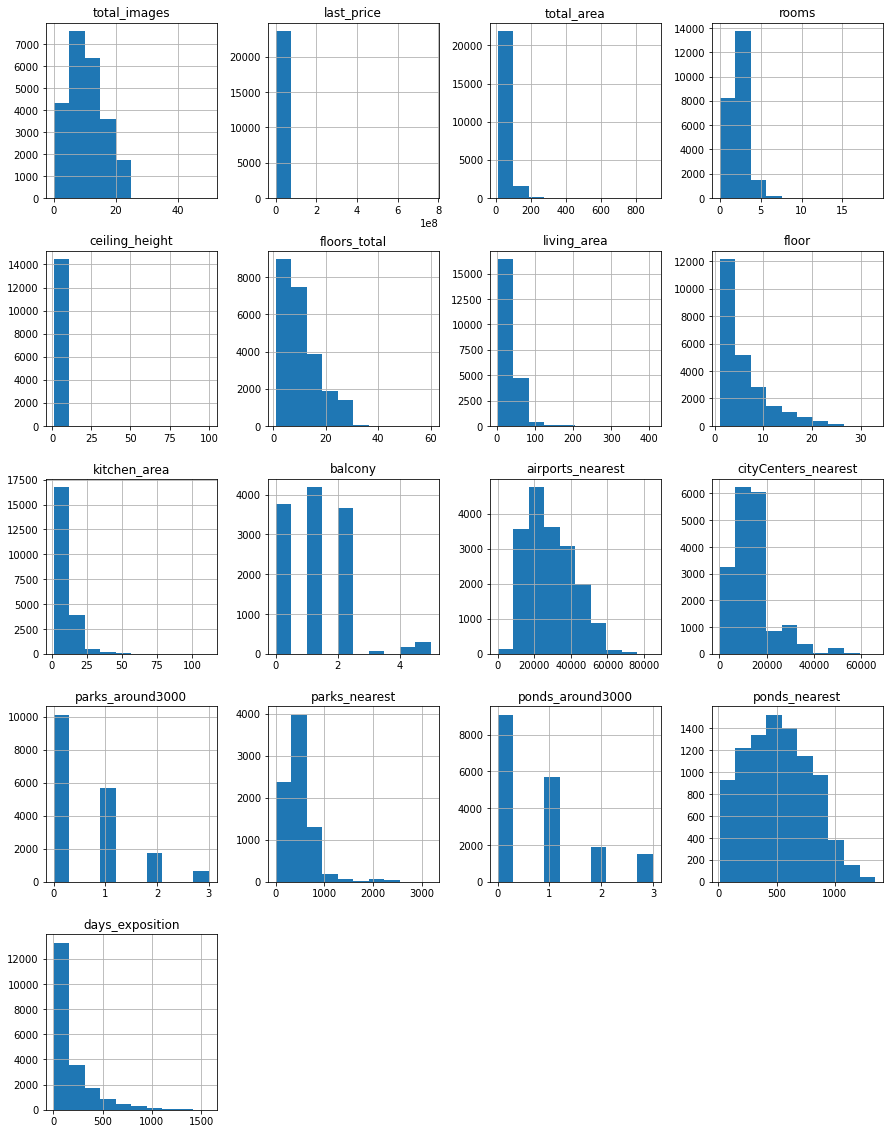

In [4]:
data.hist(figsize=(15, 20));

**Вывод:** По построенным гистограммам, на первый взгляд, данные выглядят адекватно, рассмотрим каждую колонку подробней

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод:** В некторых столбцах видим аномально высокие и низкие значения. Например в `ceiling_height` максимальная высота потолка - `100 метров`, а минимальная - `1 метр`, что очень маловерятно соответствует действительности. 

Решим, что делать с такими выбросами при дальнейшей предобработке данных

In [6]:
data.duplicated().sum()

0

**Вывод:** Повторяющихся значений не найдено

### Предобработка данных

Изучим данные по пропущенным значениям в колонках, выделенным мной ранее. Начнем со столбца `ceiling_height`

In [7]:
print(data['ceiling_height'].sort_values().unique())
print()
print('Пропущенных значений:',data['ceiling_height'].isna().sum())

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

Изучив данные, мы можем предположить, что ,скорее всего, при заполнении значений по этому пункту продавцы могли забыть разделить числа запятой, так как высота в `24 м` выглядит неправдоподобно, и ,вероятней всего, имелось в виду `2,4 м`,  где `26 м`, там `2,6 м` и т.д. 

- Обработаем такие значения, приведя их к более реалистичному виду, сдвинув на один знак влево.
- Также заполним пропуски медианным значением по высоте потолка (в среднем, минимально рекомендованной высотой считается `2,5 м`, при расчете медианы мы должны будем получить примерно те же цифры)
- Удалим строки, где высота потолка меньше `2 м` (скорее всего данные значения являются выбросами)

In [8]:
# Заменим 'неверно заполненные' значения
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] /= 10

# Заполним пропуски медианным значением высоты потолка
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()

In [9]:
# Удалим из таблицы выбросы
data = data[~(data['ceiling_height'] < 2)]

Далее расммотрим данным по столбцам `living_area` и `kitchen_area`

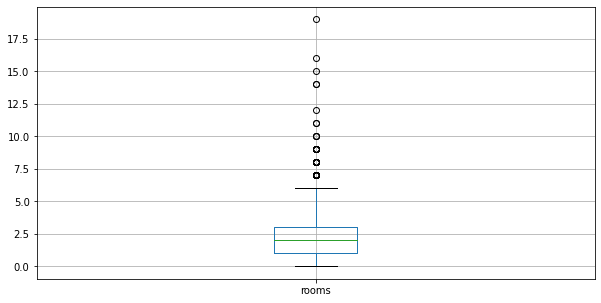

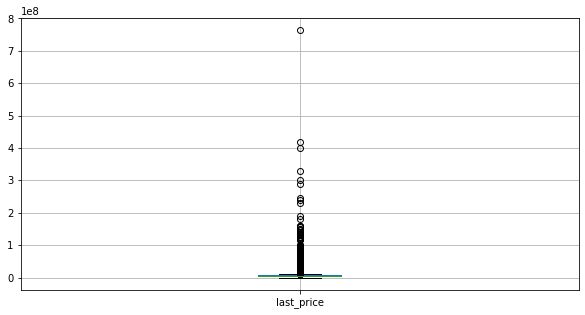

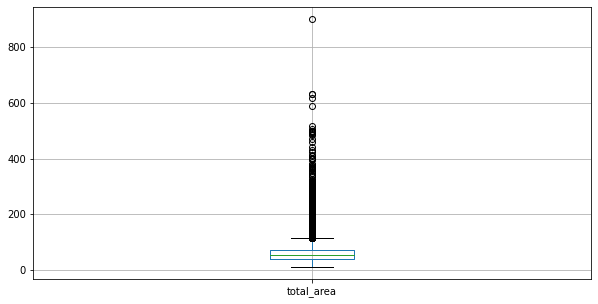

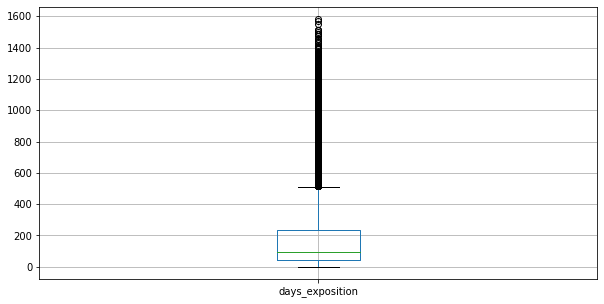

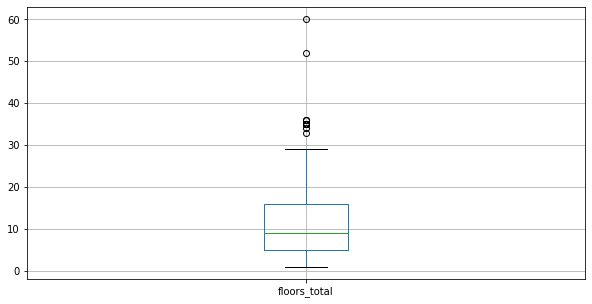

Доля выбросов составляет: 8.19 %


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21281.000000,2.128100e+04,21281.000000,21281.00000,21281.000000,21204.000000,19559.000000,21281.000000,19200.000000,10981.000000,16120.000000,16137.000000,16138.000000,6936.000000,16138.000000,7849.000000,18314.000000
mean,9.857713,5.349022e+06,55.977393,1.98783,2.684498,10.743492,32.092486,5.901038,10.034229,1.159366,28951.415571,14599.998451,0.578077,492.239187,0.726484,530.670404,126.042754
std,5.631173,3.151054e+06,23.583806,0.95613,0.217699,6.575613,15.929505,4.878388,4.648822,1.064543,12865.318349,8479.067204,0.774994,338.211846,0.905209,276.130670,118.678459
min,0.000000,4.300000e+05,12.000000,0.00000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.390000e+06,39.500000,1.00000,2.600000,5.000000,18.335000,2.000000,7.000000,0.000000,18348.000000,10085.000000,0.000000,289.000000,0.000000,312.000000,41.000000
50%,9.000000,4.500000e+06,50.500000,2.00000,2.650000,9.000000,30.000000,4.000000,9.000000,1.000000,27078.500000,13354.000000,0.000000,458.000000,0.000000,520.000000,83.000000
75%,14.000000,6.400000e+06,66.200000,3.00000,2.700000,16.000000,41.000000,8.000000,11.402500,2.000000,37593.000000,16470.000000,1.000000,613.000000,1.000000,741.000000,179.000000
max,50.000000,2.000000e+07,263.800000,6.00000,10.000000,29.000000,171.000000,27.000000,100.700000,5.000000,84853.000000,65952.000000,3.000000,3190.000000,3.000000,1344.000000,500.000000


In [10]:
#Создадим список с колонками, где встречаются выбросы
lst_of_col = ['rooms','last_price', 'total_area', 'days_exposition', 'floors_total']

#С помощью ящика с усами посмотрим на выбивыющиеся значения
for x in lst_of_col:
    plt.show(data.boxplot(x,figsize=(10,5)))

#Посчитаем какой % будет удален от общего числа записей в датафрейме

junk_ratio = (len(data[data['days_exposition'] > 500]) + len(data[data['rooms'] > 6]) + len(data[data['total_area'] > 300]) + \
              len(data[(data['last_price'] > 200000000) | (data['last_price'] < 15000)]) + len(data[data['floors_total'] >30]))/data.shape[0]
print('Доля выбросов составляет:',round(junk_ratio * 100,2),'%')

#Перезапишем данные, убрав все выбросы, определенные выше
data = data.query('not days_exposition > 500 and not rooms > 6 \
                 and not total_area > 300 and not (last_price > 20000000  or last_price < 15000) and not floors_total > 30')

#Посмотрим на данные после очистки
data.describe()

In [11]:
print('Пропущенных значений по living_area:', data['living_area'].isna().sum())
print('Пропущенных значений по kitchen_area:', data['kitchen_area'].isna().sum())

Пропущенных значений по living_area: 1722
Пропущенных значений по kitchen_area: 2081


Попробуем заполнить пропуски `living_area` и `kitchen_area` следующим образом:

1. Найдем коэффициент соотношения общей площади к жилой площади для `living_area` и точно такой же коэффициент для `kitchen_area` 
2. Заполним пропуски умножая общую площадь на коэффициент для каждого вида площади

In [12]:
# Находим коэффициент для жилой площади
living_ratio = data['living_area'].mean() / data['total_area'].mean()

#Находим коэффициент для площади кухи
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()

#Заполняем пропуски, умножая коэффициенты на общую площадь
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

Далее расмотрим данные по колонке `is_apartment`

In [13]:
print(data['is_apartment'].unique())
print('Пропущенных значений:', data['is_apartment'].isna().sum())

[nan False True]
Пропущенных значений: 18888


- Видим огромное количество пропусков (практически `90%`).

- Можно предположить, что человек намеренно не указал является ли его квартира аппартаментами или нет, ввиду того, что он не знаком с таким типом недвижимости. 

- Человек, который владеет аппартаментами явно знает, что это за тип недвижимости, поэтому в данных имеются значения с `True`.

- Будем считать, что пропуски означают, то что продаваемая недвижимость это квартира, поэтому можно заменить пропуски на `False`

In [14]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Переходим к столбцу `balcony`

In [15]:
print(data['balcony'].unique())
print('Пропущенных значений:', data['balcony'].isna().sum())

[nan  2.  1.  0.  5.  4.  3.]
Пропущенных значений: 10300


- Можем предположить, что пропусками явлются квартиры без балконов, где продавец это просто забыл указать
- Будем считать, что пропуск является отсуствием балкона и заполним их `0`

In [16]:
data['balcony'] = data['balcony'].fillna(0) 

Изучим оставшиеся столбцы с пропусками

In [17]:
na_lst = ['floors_total','locality_name','airports_nearest','cityCenters_nearest','parks_around3000', \
          'parks_nearest','ponds_around3000','ponds_nearest','days_exposition']
for column in na_lst:
    print(f'Пропущенных значений в {column}: {data[column].isna().sum()}')

Пропущенных значений в floors_total: 77
Пропущенных значений в locality_name: 43
Пропущенных значений в airports_nearest: 5161
Пропущенных значений в cityCenters_nearest: 5144
Пропущенных значений в parks_around3000: 5143
Пропущенных значений в parks_nearest: 14345
Пропущенных значений в ponds_around3000: 5143
Пропущенных значений в ponds_nearest: 13432
Пропущенных значений в days_exposition: 2967


По следующим столбцам сложно сделать какую-либо замену ввиду того, что недостаточно предоставленной информации:

- `airports_nearest` -  расстояние до ближайшего аэропорта в метрах (м)

- `cityCenters_nearest` -  расстояние до центра города (м)
- `parks_around3000` - число парков в радиусе 3 км
- `parks_nearest` - расстояние до ближайшего парка (м)
- `ponds_around3000` - число водоёмов в радиусе 3 км
- `ponds_nearest` -  расстояние до ближайшего водоёма (м)

Поэтому средними/медианными или другими значениями некорректно заменять кол-во парков, кол-во этажей в доме, наличие пруда и т.д. Будет правильней уточнить у разработчиков или коллег с чем связаны пропуски и уже потом решать, что с ними делать.

В рамках данного анализа оставим эти колонки без изменений.

По столбцу `locality_name` мы можем удалить пропуски, так как:

1. Кол-во строк с пропусками относительно всего датафрейма невелико ( ≈ `0,2%`)
2. Населенный пункт является немаловажным фактором при выборе квартиры, поэтому при невозможности это определить будет логично от таких данных избавиться, так как они не окажут колоссального эффекта на дальнейший анализ данных

Так же поступим со строками из `floors_total`

Столбец `days_exposition` заполним пропуски `0`, этот параметр будет в дальнейшем исследоваться, поэтому удаление всех строк может исказить полученный результат.

In [18]:
#Удалим пустые строки населенных пунктов из датафрейма
data = data.query('not locality_name.isna() and not floors_total.isna()')

In [19]:
# Заполнили пропуски 0
data['days_exposition'] = data['days_exposition'].fillna(0)

Осталось изменить тип данных, приведи его в правильный формат для некоторых столбцов:

In [20]:
# Преобразуем в правильный тип данных, выявленные нами ранее столбцы
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['days_exposition'] = data['days_exposition'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)

In [21]:
#Функция для замены неявных дубликатов

def locality(row): 
    delim = '' 
    if row == str(row): # если это текст 
        for elem in row.split(' '): #['посёлок', 'Шушары'] 
            if elem[0].isupper(): # if первая буква заглавная 
                delim += elem + ' ' #закинуть слово в str + probel на случай двойных названий 
    return delim.strip() # удалить лишние пробелы 

#Применим функцию и замененим значения
data['locality_name'] = data['locality_name'].apply(locality)

### Посчитайте и добавьте в таблицу новые столбцы

In [22]:
#посчитаем цену квадратного метра и переведем в тип данных int
data['price_per_sm'] = (data['last_price'] / data['total_area']).astype('int')

#создадим столбец дня недели
data['weekday'] = data['first_day_exposition'].dt.weekday

#создадим столбец месяца
data['month'] = data['first_day_exposition'].dt.month

#создадим столбец года
data['year'] = data['first_day_exposition'].dt.year

#напишем функцию категоризации по этажам
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

#создадим столбец с расстоянием до центра города в километрах 
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000,0)
    
#применим функцию и создадим новый столбец категоризации по этажам 
data['floor_type'] = data.apply(floor_type, axis = 1)

### Проведите исследовательский анализ данных

#### Изучим и опишем подробнее следующие параметры:

Начнем с Общей площади - `total_area`

count    21162.000000
mean        55.945831
std         23.544505
min         12.000000
25%         39.500000
50%         50.400000
75%         66.200000
max        263.800000
Name: total_area, dtype: float64 



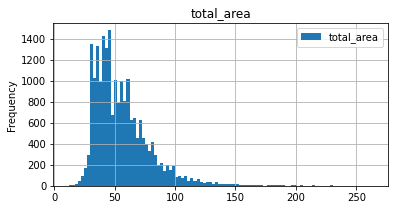

Вывод: по полученным данным, мы можем говорить о том, что площадь total_area в нашей выборке колеблется от 12.0 до 263.8 м2, среднее значение в пределах 55.95 м2, а медиана 50.4 м2.

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец living_area 

count    21162.000000
mean        32.094808
std         15.781782
min          2.000000
25%         18.700000
50%         29.900000
75%         40.567500
max        171.000000
Name: living_area, dtype: float64 



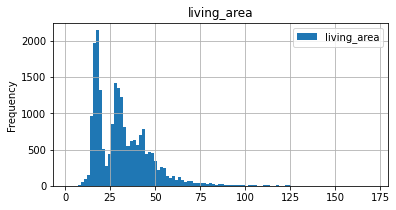

Вывод: по полученным данным, мы можем говорить о том, что площадь living_area в нашей выборке колеблется от 2.0 до 171.0 м2, среднее значение в пределах 32.09 м2, а медиана 29.9 м2.

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец kitchen_area 

count    21162.000000
mean         9.938073
std          4.614301
min          1.300000
25%          7.000000
50%          9.000000
75%         11.400000
max        100.700000
Name: kitchen_area, dtype: float64 



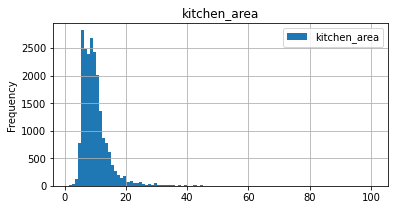

Вывод: по полученным данным, мы можем говорить о том, что площадь kitchen_area в нашей выборке колеблется от 1.3 до 100.7 м2, среднее значение в пределах 9.94 м2, а медиана 9.0 м2.

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец last_price 

count    2.116200e+04
mean     5.345089e+06
std      3.147393e+06
min      4.300000e+05
25%      3.390000e+06
50%      4.500000e+06
75%      6.400000e+06
max      2.000000e+07
Name: last_price, dtype: float64 



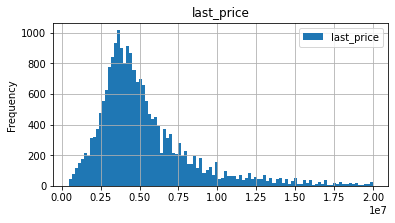

Вывод: по полученным данным, мы можем говорить о том, что цена на момент снятия публикации в нашей выборке колеблется от 0.43 до 20.0 млн. руб., среднее значение в пределах 5.35 млн. руб., а медиана 4.5 млн. руб.

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец rooms 

count    21162.000000
mean         1.987808
std          0.955729
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64 



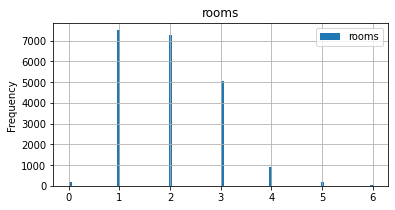

Вывод: по полученным данным, мы можем говорить о том, что количество комнат в нашей выборке колеблется от 0 до 6 комнат, среднее значение в пределах 2 комнат, а медиана 2 комнаты.

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец ceiling_height 

count    21162.000000
mean         2.684464
std          0.217950
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64 



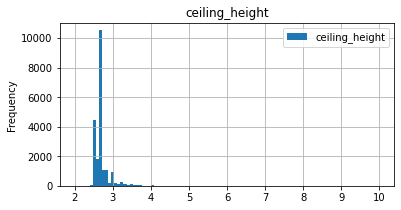

Вывод: по полученным данным, мы можем говорить о том, что площадь ceiling_height в нашей выборке колеблется от 2.0 до 10.0 м2, среднее значение в пределах 2.68 м2, а медиана 2.65 м2.

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец floor 

count    21162.000000
mean         5.886069
std          4.863450
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64 



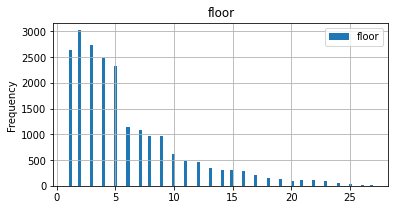

Вывод: по полученным данным, мы можем говорить о том, что floor в нашей выборке колеблется от 1 до 27 этажа, среднее значение в пределах 6 этажа, а медиана 4 этаж.

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец floors_total 

count    21162.000000
mean        10.744495
std          6.572629
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64 



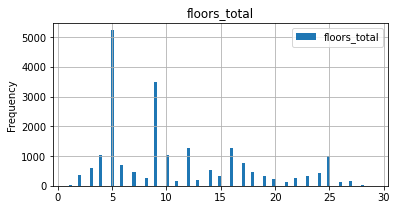

Вывод: по полученным данным, мы можем говорить о том, что floors_total в нашей выборке колеблется от 1 до 29 этажа, среднее значение в пределах 11 этажа, а медиана 9 этаж.

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец floor_type 



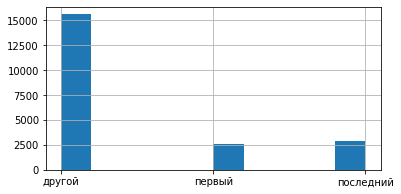

Вывод: по полученным данным, мы можем говорить о том, что чаще всего квартира находится не на первом и последнем этаже

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец cityCenters_nearest 

count    16036.000000
mean     14598.226989
std       8483.318382
min        208.000000
25%      10087.000000
50%      13354.000000
75%      16458.750000
max      65952.000000
Name: cityCenters_nearest, dtype: float64 



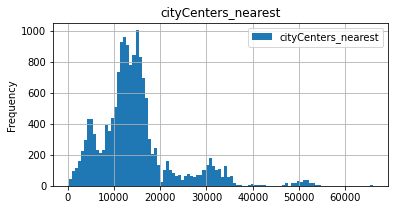

Вывод: по полученным данным, мы можем говорить о том, что расстояние cityCenters_nearest в нашей выборке колеблется от 208 до 65952 м2, среднее значение в пределах 14598 м2, а медиана 13354 м2.

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец airports_nearest 

count    16019.000000
mean     28956.488420
std      12866.454813
min          0.000000
25%      18321.000000
50%      27106.000000
75%      37593.000000
max      84853.000000
Name: airports_nearest, dtype: float64 



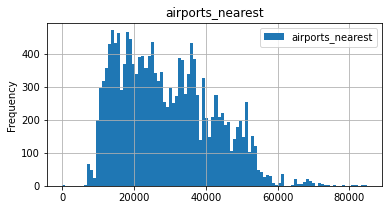

Вывод: по полученным данным, мы можем говорить о том, что расстояние airports_nearest в нашей выборке колеблется от 0 до 84853 м2, среднее значение в пределах 28956 м2, а медиана 27106 м2.

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец parks_nearest 

count    6896.000000
mean      492.053364
std       337.303884
min         1.000000
25%       289.000000
50%       458.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64 



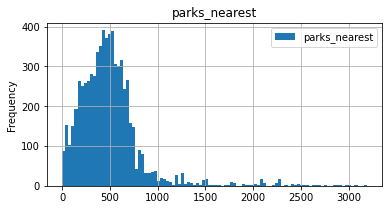

Вывод: по полученным данным, мы можем говорить о том, что расстояние parks_nearest в нашей выборке колеблется от 1 до 3190 м2, среднее значение в пределах 492 м2, а медиана 458 м2.

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец weekday 

count    21162.000000
mean         2.572299
std          1.792637
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64 



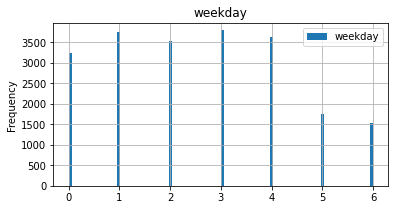

Вывод: по полученным данным, мы можем говорить о том, что чаще всего объявление публиковали в Четверг

 ------------------------------------------------------------------------------------------------------------------------------ 

Далее расмотрим столбец month 

count    21162.000000
mean         6.399206
std          3.489922
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64 



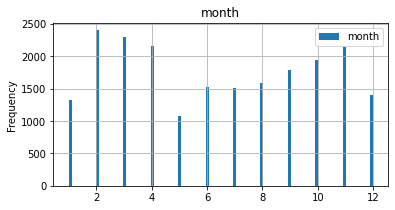

Вывод: по полученным данным, мы можем говорить о том, что чаще всего объявление публиковали в Феврале

 ------------------------------------------------------------------------------------------------------------------------------ 

 



In [23]:
#Создадим функцию, которая будет строить гистограмму с заданными параметрами для анализируемых нами столбцами
def plot(row):
    data.plot(y=row, title=row, kind='hist', bins=100, grid=True, figsize=(6,3))

#Создадим список анализируемых столбцов   
lst_of = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', \
          'floors_total','floor_type', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest','weekday','month']

#Переберем каждый столбец из списка
for row in lst_of:
    
    #Проверяем значения столбца на содержание числовых значений или дат
    if row != 'floor_type':
        
        #Выводим статистику по всем числовым столбцам
        print(data[row].describe(), '\n')
        
        #Строим гистограмму по столбцу
        plt.show(plot(row), '\n')
   
    #В зависимости от типа столбца немного видоизменяется вывод по нему
        
        #Вывод для столбцов Общая площадь, Жилая площадь, Площадь кухни, Высота потолка
        if row in ['total_area','living_area', 'kitchen_area', 'ceiling_height']:
            print(f'Вывод: по полученным данным, мы можем говорить о том, что площадь {row} в нашей выборке колеблется от '
                  f'{round(data[row].describe()[3],2)} до {round(data[row].describe()[-1],2)} м2, среднее значение '
                  f'в пределах {round(data[row].describe()[1],2)} м2, а медиана {round(data[row].describe()[5],2)} м2.')
        
        #Вывод для столбцов этаж и кол-во этажей
        elif row in ['floor','floors_total']:
            print(f'Вывод: по полученным данным, мы можем говорить о том, что {row} в нашей выборке колеблется от ' 
                  f'{int(round(data[row].describe()[3],0))} до {int(round(data[row].describe()[-1],0))} этажа, среднее значение в ' 
                  f'пределах {int(round(data[row].describe()[1],0))} этажа, а медиана {int(round(data[row].describe()[5],0))} этаж.')
            
        #Вывод для столбцов расстояние до ближайшего аэропорта, парка и расстояние до центра города
        elif row in ['cityCenters_nearest', 'airports_nearest', 'parks_nearest']:
            print(f'Вывод: по полученным данным, мы можем говорить о том, что расстояние {row} в нашей выборке колеблется от ' 
                  f'{int(round(data[row].describe()[3],0))} до {int(round(data[row].describe()[-1],0))} м2, среднее значение в ' 
                  f'пределах {int(round(data[row].describe()[1],0))} м2, а медиана {int(round(data[row].describe()[5],0))} м2.')
        
        #Вывод для столба кол-во комнат
        elif row == 'rooms':
            print(f'Вывод: по полученным данным, мы можем говорить о том, что количество комнат в нашей выборке колеблется от ' 
                  f'{int(round(data[row].describe()[3],0))} до {int(round(data[row].describe()[-1],0))} комнат, среднее значение в '
                  f'пределах {int(round(data[row].describe()[1],0))} комнат, а медиана {int(round(data[row].describe()[5],0))} комнаты.')
        
        #Вывод для столбца цена на момент снятия публикации
        elif row == 'last_price':
            print(f'Вывод: по полученным данным, мы можем говорить о том, что цена на момент снятия публикации в нашей выборке ' 
                  f'колеблется от {round(data[row].describe()[3]/1000000,2)} до {round(data[row].describe()[-1]/1000000,2)} млн. руб., '
                  f'среднее значение в пределах {round(data[row].describe()[1]/1000000,2)} млн. руб., а медиана {round(data[row].describe()[5]/1000000,2)} млн. руб.')
        
        #Вывод для столбца неделя публикации
        elif row in ['weekday']:
            print('Вывод: по полученным данным, мы можем говорить о том, что чаще всего объявление публиковали в Четверг')
        
        #Вывод для столбца месяц публикации
        elif row in ['month']:
            print('Вывод: по полученным данным, мы можем говорить о том, что чаще всего объявление публиковали в Феврале')
            
    else:
        #График для столбца тип этажа
        plt.show(data['floor_type'].hist(figsize=(6,3)))
        #Вывод по графику
        print('Вывод: по полученным данным, мы можем говорить о том, что чаще всего квартира находится не на первом и последнем этаже')
    
    #Отделяем каждый новый график с выводом чертой для более удобного вида
    print('\n','-'*126,'\n')
    
    #Берем следующий по счету столбец и проделываем все действия выше
    print(f'Далее расмотрим столбец {lst_of[lst_of.index(row) + 1 if row != "month" else 0]}' \
              if row != "month" else '', '\n')
            

#### Изучите, как быстро продавались квартиры

count    18205.000000
mean       125.917495
std        118.670655
min          1.000000
25%         40.000000
50%         83.000000
75%        179.000000
max        500.000000
Name: days_exposition, dtype: float64


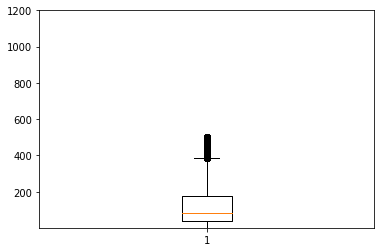

In [24]:
#Рассмотрим статистическую информацию по данному столбцу, убрав нулевые значения, чтобы не искажать полученный рез-т

#Создадим переменную, где будем хранить очищенную информацию по дням
days_exp = data.query('days_exposition >0')['days_exposition']

#Выведем стат. информацию по ней
print(days_exp.describe())

#Также построим диаграмму размаха
plt.boxplot(days_exp)
plt.ylim(1,1200);

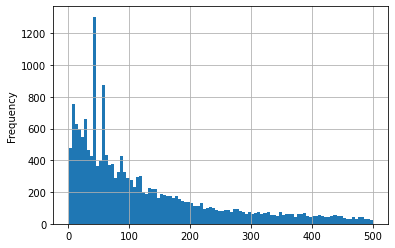

In [25]:
#Построим гистограмму, ограничив диапазон значения согласно диаграмме размаха
days_exp.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,500));

**Вывод:** По графикам можно сделать вывод, что медианное время продажи - 95 дней. Среднее время продажи - 181 день.
Быстрой продажей можно назвать срок до 100, а долгой более 500 дней(согласно диаграмме размаха)

При этом после ограничения диапазона по диаграмме размаха мы видим несколько всплесков до 100 дней. Изучим их подробнее

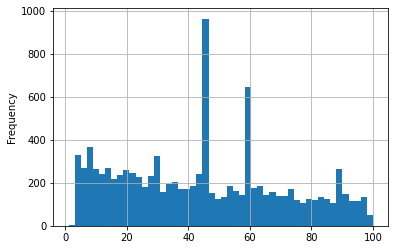

In [26]:
#Построим гистограмму, ограничив значения до 100 дней 
days_exp[days_exp < 100].plot(y = 'days_exposition', kind = 'hist', bins = 50, grid = True, range = (1,100));

**Вывод:** Мы видим примерно в районе 45 и 60 дней резкий всплеск снятия публикаций, что не обязательно должно означать то, что недвижимость была продана. 

Я не нашел какой-то взаимосвязи с таким резким скачком в эти дни, поэтому зашел на сайт `Яндекс Недвижимости` и обнаружил статью по правилам размещения объявлений и наткнулся на пункт про `Сроки публикаци` - [Статья](https://yandex.ru/support/realty/owner/home/add-ads-housing.html#concept_ohg_pft_flb), поэтому можно предположить что на этих днях происходило автоматическое удаление объявлений о продаже и поэтому они так выбиваются из общего графика.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [27]:
#Создадим новый датафрейм с необходимыми данными
data_new = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms','floor_type','weekday', 'month', 'year']]

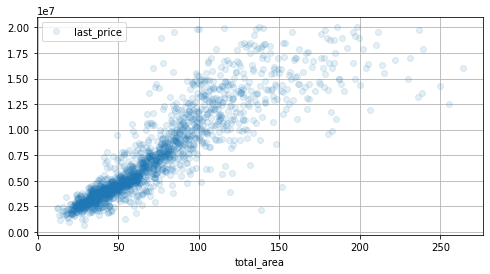

Коэффициент корреляция Пирсона составляет: 0.77

 ---------------------------------------------------------------------------------------------------------------------------- 



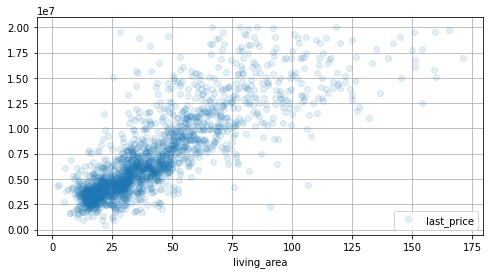

Коэффициент корреляция Пирсона составляет: 0.664

 ---------------------------------------------------------------------------------------------------------------------------- 



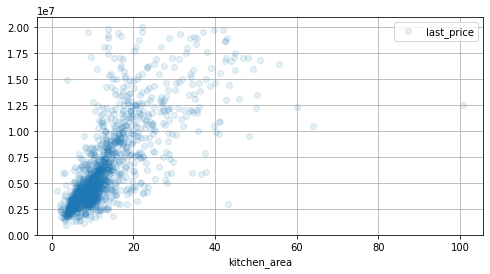

Коэффициент корреляция Пирсона составляет: 0.59

 ---------------------------------------------------------------------------------------------------------------------------- 



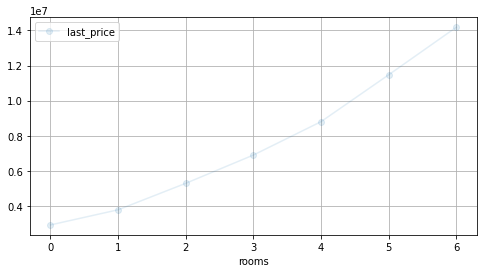

Коэффициент корреляция Пирсона составляет: 0.5

 ---------------------------------------------------------------------------------------------------------------------------- 



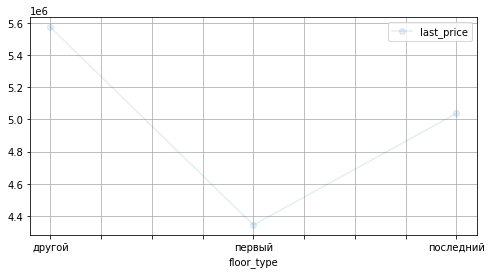


 ---------------------------------------------------------------------------------------------------------------------------- 



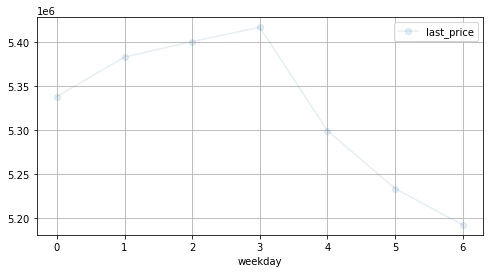

Коэффициент корреляция Пирсона составляет: -0.014

 ---------------------------------------------------------------------------------------------------------------------------- 



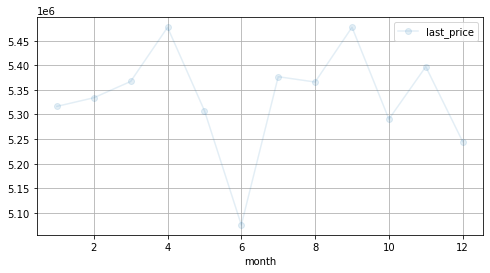

Коэффициент корреляция Пирсона составляет: -0.001

 ---------------------------------------------------------------------------------------------------------------------------- 



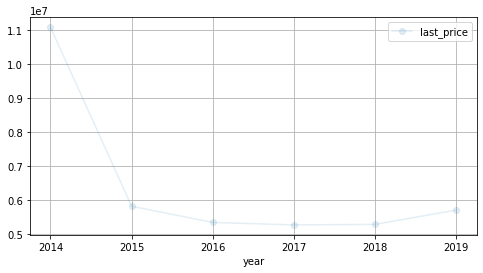

Коэффициент корреляция Пирсона составляет: 0.012

 ---------------------------------------------------------------------------------------------------------------------------- 



In [28]:

#создадим функцию, которая будет строить диаграмму рассеяния на основе средних значений цены по определнному столбцу
def scar_plot(row,style='o'):
    plt.show(data_new.pivot_table(index=row, values='last_price').plot(grid=True, style=style, figsize=(8, 4), alpha = 0.12))

#создадим список столбцов за исключением цены
lst_of_col = list(data_new.columns[1:])

#создадим цикл и пройдемся по каждому столбцу применив созданную функцию, дополнив расчетом коэффициента Пирсона для каждого столбца 
for col in lst_of_col:
    
    #Диаграмма и коэфф. для Общей площади, Жилой площади и площади кухни
    if col in ['total_area', 'living_area', 'kitchen_area']:
        scar_plot(col)
        print('Коэффициент корреляция Пирсона составляет:', round(data_new[col].corr(data_new['last_price']),3))
    
    #Диаграмма и коэфф. для кол-ва комнат, даты, месяца и года публикации
    elif col in ['rooms','weekday', 'month', 'year']:
        scar_plot(col,style='o-')
        print('Коэффициент корреляция Пирсона составляет:', round(data_new[col].corr(data_new['last_price']),3))
    
    #Диаграмма для типа этажа
    else:
        scar_plot(col,style='o-')
        
    #Отделим графики чертой для удобства
    print('\n','-'*124,'\n')
    


Для более наглядного представления коэффициента корреляции построим хитмап по датафрейму с необходимыми столбцами

In [33]:
data_new.corr()

,last_price,total_area,living_area,kitchen_area,rooms,weekday,month,year
last_price,1.000000,0.769531,0.664154,0.590105,0.500202,-0.013952,-0.001172,0.012107
total_area,0.769531,1.000000,0.927279,0.572321,0.790595,-0.010755,0.000092,-0.038433
living_area,0.664154,0.927279,1.000000,0.344303,0.865099,-0.005618,-0.006956,-0.029975
kitchen_area,0.590105,0.572321,0.344303,1.000000,0.221100,-0.010614,0.006934,-0.020095
rooms,0.500202,0.790595,0.865099,0.221100,1.000000,-0.002244,-0.007580,-0.017959
weekday,-0.013952,-0.010755,-0.005618,-0.010614,-0.002244,1.000000,0.014240,-0.009598
month,-0.001172,0.000092,-0.006956,0.006934,-0.007580,0.014240,1.000000,-0.301510
year,0.012107,-0.038433,-0.029975,-0.020095,-0.017959,-0.009598,-0.301510,1.000000


<AxesSubplot:>

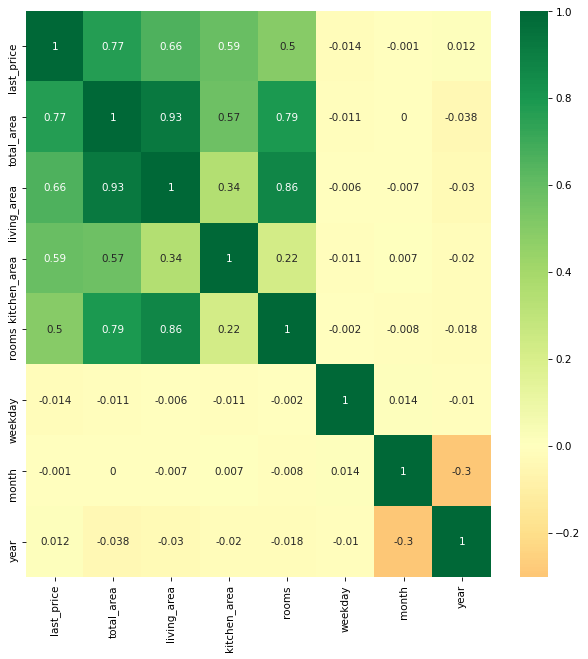

In [29]:
plt.figure(figsize=(10,10), dpi= 75)
sns.heatmap(round(data_new.corr(),3), cmap='RdYlGn', center=0, annot=True)

**Вывод:** 

По полученным графикам, мы можем сказать о том, что:

- Наибольшая зависимость среди всех параметров прослеживается между ценой и общей площадью помещения, далее идет зависимость между ценой и жилой площадью и затем цена и площадь кухни и есть совсем небольшая зависимость роста цен от роста кол-ва комнат.
- Среди остальных параметров какая-то явная зависимость отсуствует.
- В среднем цена жилья на первом этаже дешевле чем на последнем и другом
- В среднем в Четверг и в Апреле были опубликованы самые дорогие варианты жилья
- В среднем в 2014 году были опубликованы самые дорогие варианты жилья, потом тенденция постепенно снижалась до 2018 и в 2019 снова виден рост.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

,locality_name,publ_count,mean_price_per_sm
222,Санкт-Петербург,13793,108709
145,Мурино,552,86284
104,Кудрово,433,95481
296,Шушары,416,78514
33,Всеволожск,366,67128
201,Пушкин,333,101719
87,Колпино,322,75277
169,Парголово,311,90078
41,Гатчина,283,68933
34,Выборг,222,58149


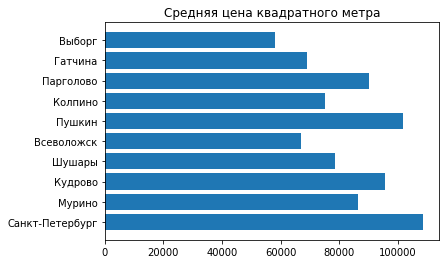

In [30]:
#Создадим сводную таблицу по средней цене за кв.м и кол-ву объявлений в зависимости от населенного пункта и поместим ее в переменную
data_top10 = data.pivot_table(index='locality_name',values='price_per_sm',aggfunc=['count','mean']).reset_index()

#Уберем мультииндекс
data_top10.columns = data_top10.columns.droplevel(1)

#Переименуем колонки
data_top10.columns = ['locality_name','publ_count','mean_price_per_sm']

#Округлим значения до целого числа и переведем в формат int для лучшего восприятия
data_top10['mean_price_per_sm'] = round(data_top10['mean_price_per_sm'],0).astype(int)

#Отсортируем по кол-ву объявлений и выведем первые 10 значений
data_t = data_top10.sort_values('publ_count',ascending=False).head(10)
display(data_t)

#Построим столбчатую диаграмму
plt.title('Средняя цена квадратного метра')
plt.barh(data_t['locality_name'],data_t['mean_price_per_sm']);



**Вывод:** 

стоимость за $1$м$^2$ жилья:

- Самая высокая  в `Санкт-Петербурге` - 108 709 рублей 

- Самая низкая в `Выборге` - 58 149 рублей

#### Вычислите среднюю цену каждого километра в Санкт-Петербурге. Опишите, как стоимость объектов зависит от расстояния до центра города.

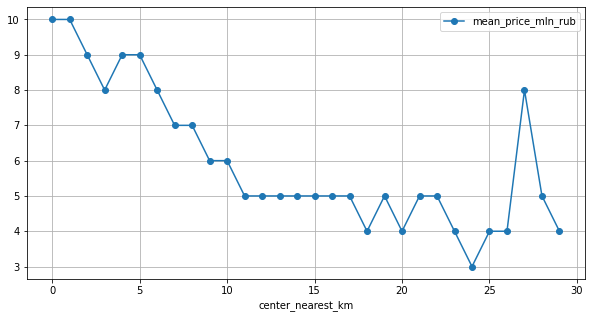

Коэффициент корреляции Пирсона составляет: -0.79


In [31]:
#Создадим новый датафрейм, оставив в нем только записи по Санкт-Петербургу и убрав нулевые значения по удаленности от центра
data_spb = data[(data['locality_name'] == 'Санкт-Петербург') & (~data['cityCenters_nearest_km'].isna())]

#Создадим еще один датафрейм, сделав из таблицы в предыдущем шаге сводную по удаленности от центра и его средней цене
spb_pivot = data_spb.pivot_table(index='cityCenters_nearest_km',values='last_price').reset_index()

#Переименуем колонки для лучшего понимания, что в них хранится
spb_pivot.columns = ['center_nearest_km','mean_price_mln_rub']

#Для лучшего восприятия переведем значения в колонке со средней ценой в млн. руб и изменим на формат int
spb_pivot['mean_price_mln_rub'] = (spb_pivot['mean_price_mln_rub']/1000000).astype(int)

#Построим график
plt.show(spb_pivot.plot(x='center_nearest_km',y='mean_price_mln_rub',grid=True, style='o-', figsize=(10, 5)))

#Выведем значение коэфф. корр. Пирсона
print('Коэффициент корреляции Пирсона составляет:', round(spb_pivot['center_nearest_km'].corr(spb_pivot['mean_price_mln_rub']),2))

**Вывод:** Исходя из графика и полученного коэффицента корреляции мы можем с уверенностью сказать, что в среднем, в Санкт-Петербурге удаленность квартиры от центра города напрямую влияет на ее стоимость:

- Чем она ближе к центру, тем цена выше и наоборот
- Чем дальше от центра, тем цена ниже.

### Общий вывод

Мы получили данные по рынку недвижимости, сделали необходимую предобратку данных, добавили необходимые столбцы с различными расчетами и провели исследовательский анализ для полного понимания происходящего. 

**Вкратце, мы выяснили, что в среднем:**

- Общая площадь помещения - $56$ $м^2$
- Cредняя цена помещения - $5.35$ $млн. руб.$
- Количество комнат - $2$
- Высота потолка - $2.7$ $м$
- Расстояние до центра населенного пункта - $14.6$ $км$

**Срок продажи квартиры** 

- Среднее время продажи - 181 день.
- Быстрой продажей можно назвать срок до 100 дней, а долгой более 500 дней

**Факторы, влияющие на стоимость объекта:**

- На стоимость больше влияет общая площадь квартиры и в меньшей степени жилая площадь, площадь кухни и кол-во комнта
- В среднем цена жилья на первом этаже дешевле чем на последнем и другом
- В среднем в Четверг и в Апреле были опубликованы самые дорогие варианты жилья
- В 2014 в среднем цены были выше, чем в остальных годах, вплоть до 2018, но в 2019 тенденция к росту цен снова появилась

**Стоимость квадратного метра в топ-10 населённых пунктов:**

- Самая высокая в Санкт-Петербурге - 108 709 рублей
- Самая низкая в Выборге - 58 149 рублей

**Стоимосость жилья в Санкт-Петербурге в зависимости от расстояния до центра города:**

- Чем жилье ближе к центру, тем цена выше и наоборот
- Чем жилье дальше от центра, тем цена ниже.